In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data
1 - Positive

2 - Neutral

3 - Negative

In [ ]:
gsheetid = "1rWH-a93BC8kRT1y9aZpOMoUfdSfbJAEQ4epqvlLIirg"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)

In [ ]:
df = pd.read_csv(gsheet_url)
df = df.iloc[:, [0, 2]]
print(df['Headlines'][4])

Tesla shares have fallen 28% since Elon Musk took over Twitter, lagging other carmakers


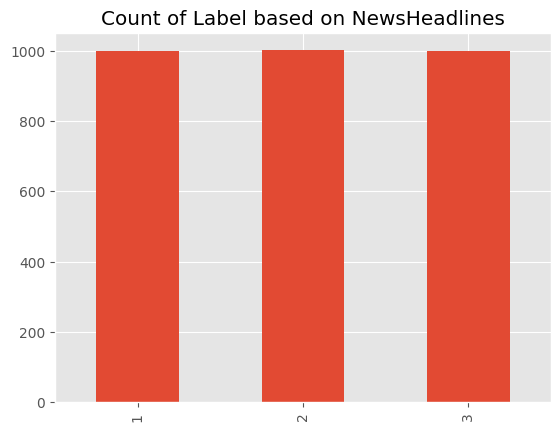

In [ ]:
ax = df['Label'].value_counts().sort_index().plot(kind='bar', title="Count of Label based on NewsHeadlines").figsize=(10, 5)

# Preprocessing
## lowercase, remove stopwords, remove punctuation

In [ ]:
def lemmatize_word(word, pos_tag):
    # map NLTK POS tags to WordNet POS tags
    pos_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'J': wordnet.ADJ,
        'R': wordnet.ADV
    }
    # lemmatize the word
    pos = pos_map.get(pos_tag[0], wordnet.NOUN)
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word, pos)

def remove_punctuation(text):
  # replace punctuation marks with an empty string
  from string import punctuation
  punctuation += '’'
  translator = str.maketrans('', '', punctuation)
  return text.translate(translator)

In [ ]:
def preprocess_text(df_column:pd.core.series.Series):

  stopwords_list = set(stopwords.words('english'))

  # remove stop words
  df_column = df_column.apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stopwords_list]))
  # remove punctuation
  df_column = df_column.apply(remove_punctuation)
  # tokenize and apply POS tagging and lemmatization
  df_column = df_column.apply(lambda x: ' '.join([lemmatize_word(word, tag) for word, tag in pos_tag(word_tokenize(x))]))

  return df_column

In [ ]:
df['Headlines'] = preprocess_text(df['Headlines'])

In [ ]:
print("After Preprocessing:")
print(df['Headlines'][3:7])

After Preprocessing:
3    apple stock touch alltime high amid big plan d...
4    tesla share fall 28 since elon musk take twitt...
5    meta stock jump company report first revenue g...
6    strange thing return boost netflix subscriber ...
Name: Headlines, dtype: object


# Training

In [ ]:
x = df['Headlines']
y = df['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17, shuffle = True)

train_headlines = x_train
test_headlines = x_test

In [ ]:
# implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(1,2))
traindataset=countvector.fit_transform(train_headlines)

In [ ]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=450,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=450)

In [ ]:
## Predict for the Test Dataset
test_transform= []
test_transform = test_headlines
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
a = ["bad bad fall plummet flop"]
df = pd.DataFrame(a, columns=['headline'])

In [ ]:
b = countvector.transform(df)

In [ ]:
randomclassifier.predict(b)

array([1])

In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Compute Accuracy based on test dataset

In [ ]:
# CONFUSION MATRIX
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[129  41  23]
 [ 67 127  10]
 [ 52  19 133]]
0.6472545757071547
              precision    recall  f1-score   support

           1       0.52      0.67      0.59       193
           2       0.68      0.62      0.65       204
           3       0.80      0.65      0.72       204

    accuracy                           0.65       601
   macro avg       0.67      0.65      0.65       601
weighted avg       0.67      0.65      0.65       601



In [ ]:
# import pickle

# # Assuming you have a trained RandomForestClassifier model called 'model'
# model = randomclassifier

# # Save the model to a file
# filename = 'random_forest_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)


# main

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:0

In [ ]:
# specify the paths to your model and CountVectorizer files
model_path = "/content/drive/MyDrive/NLP_ASSIGNMENT/random_forest_model.pkl"
vectorizer_path = "/content/drive/MyDrive/NLP_ASSIGNMENT/countvector.pkl"

# load the trained model
with open(model_path, "rb") as f:
    model = pickle.load(f)

# load the trained CountVectorizer
with open(vectorizer_path, "rb") as f:
    countvector = pickle.load(f)

In [ ]:
import gradio as gr

def predict(news_headlines):
    d = {'headline': [news_headlines]}
    temp_df = pd.DataFrame(data=d)
    temp_df['headline'] = preprocess_text(temp_df['headline'])


    preprocessed_text = temp_df['headline'][0]

    news_headline_vector = countvector.transform(temp_df['headline'])
    predictions = model.predict(news_headline_vector)


    output = ''
    if predictions == 1:
        output = "Positive"
    elif predictions == 3:
        output = "Negative"
    else:
        output = "Neutral"



    return preprocessed_text, output

demo = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="News Headline Here..."),
    outputs=["text", "text"]
)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0f1a345e49d711ed1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
'''
Tesla stock rises again, for record 12-day win streak
Twitter’s Stock Falls Further as Doubts Swirl Over Musk’s Takeover
Is Apple Stock a Buy Near $185?
'''

'\nTesla stock rises again, for record 12-day win streak\nTwitter’s Stock Falls Further as Doubts Swirl Over Musk’s Takeover\nIs Apple Stock a Buy Near $185?\n'